In [1]:
import sys
sys.path.append('src')
from src import helperfunctions as hf
from src import SABR
from src.SABR_IV_approximators import Hagan, AntonovApprox, AntonovExact, AntonovANN, AntonovANN_4layer

from src.classes import MatlabMonteCarlo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"
data_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Data"
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

In [3]:
MMC = MatlabMonteCarlo()

C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Code\matlab_code


### Bad Hagan fit

In [56]:
T = 30/365
r=0.0
alpha =0.5
beta = 0.5
rho = -.6
v = 3.
# smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
smile = MMC.simulateSABRSmile(2.5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), smoothing=False)

In [57]:
delta_real = SABR.delta(AntonovANN(), alpha, beta, rho, v, (1,1), T)
vega_real = SABR.vega(AntonovANN(), alpha, beta, rho, v, (1,1), T)

delta_real = float(smile.loc[smile['strike'] == 1.0, 'delta'])
vega_real = float(smile.loc[smile['strike'] == 1.0, 'vega'])


dF: 0.6609665000878451
1.0026168596111162


In [58]:
print(delta_real)
print(vega_real)

0.608779847198636
0.11441666518885736


In [59]:
fit = SABR.add_fit([ AntonovANN(), Hagan()], alpha=alpha, beta=beta, rho=rho, v=v, market_smile=smile.copy(), strike_price=False)
fit = fit.set_index('strike_price')

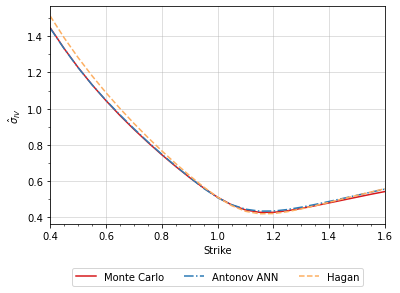

In [60]:
ax = plt.subplot()
plt.plot(fit['impl_volatility'], color=colors[0])
plt.plot(fit['Antonov ANN'], color=colors[3], ls='-.')
plt.plot(fit['Hagan'], color=colors[1], ls='--')

plt.xlim(.4,1.6)
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')

ax.xaxis.set_minor_locator(MultipleLocator(.05))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

labels = ['Monte Carlo', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_smile.eps', bbox_inches='tight')

#### Plot greeks

In [61]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_test.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_test.pkl')

In [ ]:
ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

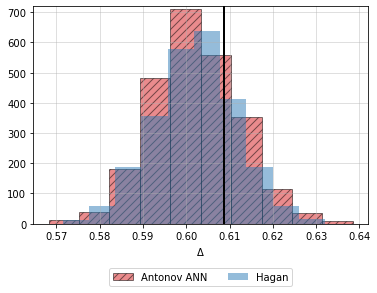

In [70]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 720
plt.ylim(0,ymax)
plt.vlines(delta_real,0, ymax, color='black', linewidth=2, antialiased=False)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta.png', bbox_inches='tight')


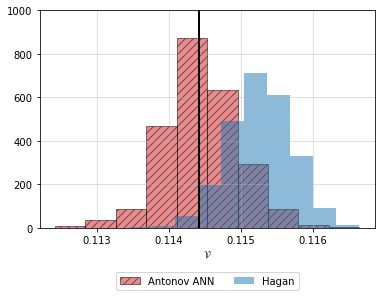

In [72]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan')

ymax = 1000
plt.ylim(0,ymax)
plt.vlines(vega_real, 0, ymax, color='black', linewidth=2, antialiased=False)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_vega.png', bbox_inches='tight')


### Smile good fit

In [8]:
T = 30/365
r=0.0
alpha =0.4
beta = 0.5
rho = .3
v = 2.0
# smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
smile = MMC.simulateSABRSmile(5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), smoothing=False)

# T = 30/365
# r=0.0
# alpha =0.6
# beta = 0.5
# rho = -.4
# v = 1.2
# # smile = hf.simulateSABRSmile(1e5, 50, T, r, 1, alpha, beta, rho, v, (0.4,1.65,0.05), 43)
# smile = MMC.simulateSABRSmile(5e5, 50, T, r, 1.0, alpha, beta, rho, v, (0.4,1.65,0.05), dx=1e-7)

fit = SABR.add_fit([ AntonovANN(), Hagan()], alpha=alpha, beta=beta, rho=rho, v=v, market_smile=smile.copy(), strike_price=False)
fit = fit.set_index('strike_price')

In [9]:
delta_real = SABR.delta(AntonovANN(), alpha, beta, rho, v, (1,1), T)
vega_real = SABR.vega(AntonovANN(), alpha, beta, rho, v, (1,1), T)

delta_real = float(smile.loc[smile['strike'] == 1.0, 'delta'])
vega_real = float(smile.loc[smile['strike'] == 1.0, 'vega'])


dF: -0.35631717507561556
1.0314229310354195


In [10]:
print(delta_real)
print(vega_real)

0.4791559309444966
0.11758623351430104


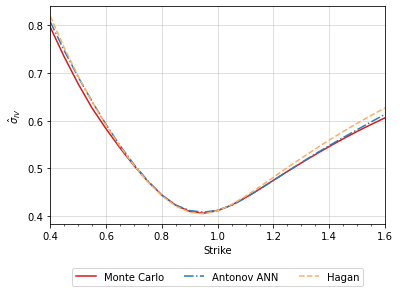

In [11]:
ax = plt.subplot()
plt.plot(fit['impl_volatility'], color=colors[0])
plt.plot(fit['Antonov ANN'], color=colors[3], ls='-.')
plt.plot(fit['Hagan'], color=colors[1], ls='--')

plt.xlim(.4,1.6)
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')

ax.xaxis.set_minor_locator(MultipleLocator(.05))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

labels = ['Monte Carlo', 'Antonov ANN', 'Hagan']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_smile_good.eps', bbox_inches='tight')

### Plot greeks

In [12]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_good.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_good.pkl')

In [ ]:
ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

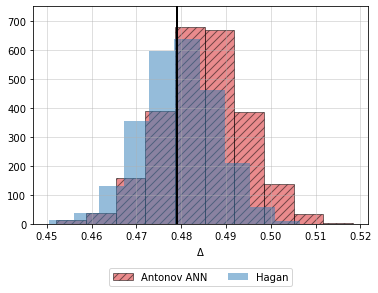

In [14]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 750
plt.ylim(0,ymax)
plt.vlines(delta_real, 0, ymax, color='black', linewidth=2, antialiased=False)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta_good.png', bbox_inches='tight')


In [19]:
42*.045

1.89

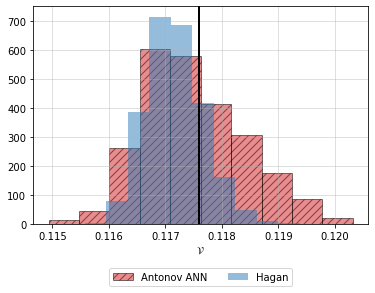

In [15]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan', color=colors[3])

ymax = 750
plt.ylim(0,ymax)
plt.vlines(vega_real, 0, ymax, color='black', linewidth=2, antialiased=False)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_vega_good.png', bbox_inches='tight')


### SPX smile

In [73]:
from src.classes import DataImporter
data_importer = DataImporter()

0.01021122932434082
0.007999420166015625


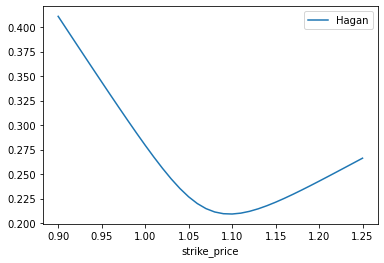

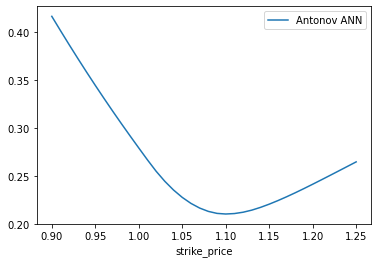

In [152]:
smile = data_importer.smile_days(20200504, 30, n_strikes=25)

hagan = SABR.calibrate_smile(smile, Hagan(), beta=beta,strike_price=False)
ann = SABR.calibrate_smile(smile, AntonovANN(), beta=beta,strike_price=False)

fit_hagan = SABR.add_fit(Hagan(), hagan[0].x[0], .5, hagan[0].x[1], hagan[0].x[2], smile)
fit_ann = SABR.add_fit(AntonovANN(), ann[0].x[0], .5, ann[0].x[1], ann[0].x[2], smile)

fit_hagan = SABR.plot_SABR(Hagan(), hagan[0].x[0], .5, hagan[0].x[1], hagan[0].x[2], smile['T'][0], strike_bounds=(.9, 1.25), strike_step=.01)
fit_ann = SABR.plot_SABR(AntonovANN(), ann[0].x[0], .5, ann[0].x[1], ann[0].x[2], smile['T'][0], strike_bounds=(.9, 1.25), strike_step=.01)

fit_hagan = fit_hagan.set_index('strike_price')
fit_ann = fit_ann.set_index('strike_price')

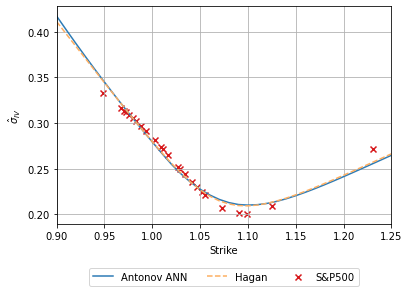

In [160]:
ax = plt.subplot()
plt.scatter(smile['strike'], smile['impl_volatility'], marker='x', color=colors[0])
plt.plot(fit_ann['Antonov ANN'], color=colors[3], ls='-')
plt.plot(fit_hagan['Hagan'], color=colors[1], ls='--')
plt.xlabel('Strike')
plt.ylabel('$\hat{\sigma}_{IV}$')
plt.xlim(.9, 1.25)

labels = ['Antonov ANN', 'Hagan', 'S&P500']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), labels=labels, ncol=3)

plt.grid()

# plt.savefig(save_path + '/bayesian_spx_smile.eps', bbox_inches='tight')

In [ ]:
samples_antonov = pd.read_pickle(data_path + '/samples_antonov_spx.pkl')
samples_hagan = pd.read_pickle(data_path + '/samples_hagan_spx.pkl')

ANN = AntonovANN()
samples_antonov['delta'] = samples_antonov.apply(lambda x: SABR.delta(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['delta'] = samples_hagan.apply(lambda x: SABR.delta(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

samples_antonov['vega'] = samples_antonov.apply(lambda x: SABR.vega(ANN, x[0], .5, x[1], x[2],(1,1), T), axis=1)
samples_hagan['vega'] = samples_hagan.apply(lambda x: SABR.vega(Hagan(), x[0], .5, x[1], x[2],(1,1), T), axis=1)

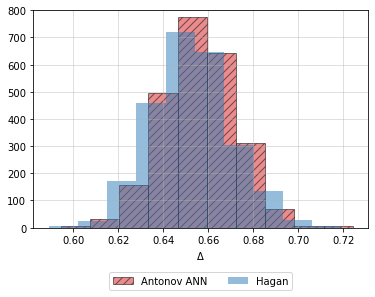

In [141]:
ax = plt.subplot()
plt.hist(samples_antonov['delta'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black')
plt.hist(samples_hagan['delta'], alpha=.5, label='Hagan', color=colors[3])

ymax = 800
plt.ylim(0,ymax)
# plt.xlim(.1,.5)

# labels = ['Training data', 'Validation data']
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.xlabel('$\Delta$')

plt.grid(alpha=.5)

# plt.savefig(save_path + '/bayesian_delta_spx.png', bbox_inches='tight')

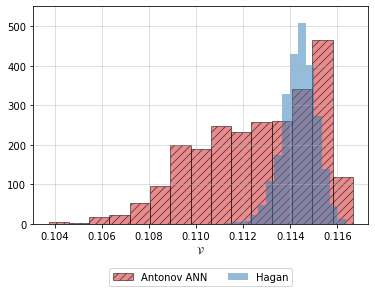

In [142]:
ax = plt.subplot()
plt.hist(samples_antonov['vega'], alpha=.5, label='Antonov ANN', color=colors[0], hatch='///', edgecolor='black', bins=15)
plt.hist(samples_hagan['vega'], alpha=.5, label='Hagan', color=colors[3], bins=15)

ymax = 550
plt.ylim(0,ymax)

plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
plt.xlabel('$\mathcal{V}$')

plt.grid(alpha=.5)

plt.savefig(save_path + '/bayesian_vega_spx.png', bbox_inches='tight')
